In [7]:
# Based 1:1 on https://www.dataquest.io/blog/k-means-clustering-us-senators/

import sklearn
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.cluster

In [2]:
%matplotlib inline

In [3]:
votes = pd.read_csv("114_congress.csv")

In [4]:
print(votes.shape) # 100 senators and they voted 18 times?

(100, 18)


In [5]:
votes.head() # Not quite, they voted 15 times, 3 oclumns are descriptive

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
# We will have to tell KMeans how many clusters we want to cluster by.
# Further, we don't want to include the first 3 columns
kmeans_model = sklearn.cluster.KMeans(n_clusters=2).fit(votes.iloc[:,3:])

In [9]:
labels = kmeans_model.labels_

In [10]:
labels

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [11]:
votes['label']=[not x for x in labels] # Me being obnoxious and wanting Republicans to be red in scatter plot below

In [12]:
# Nice, we got it mostly right: 2 independents are in the democratic cluster, 3 democrats in the republcian...
print(pd.crosstab(labels,votes["party"]))

party   D  I   R
row_0           
0       3  0  54
1      41  2   0


In [13]:
#Let's check out who we got wrong:
democratic_oddballs = votes[(votes["label"] == 1) & (votes["party"] == "D")]

In [14]:
democratic_oddballs # Reid abstained a lot, that'd explain it.

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,label
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,True
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,True
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,True


In [15]:
# Finally, we want to plot our clusters - we can use principal component analysis
# to reduce the vote data to just two clusters
pca_2=sklearn.decomposition.PCA(2)
plot_columns = pca_2.fit_transform(votes.iloc[:,3:-1])

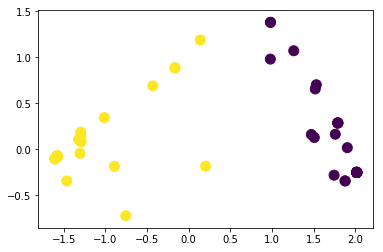

In [16]:
# Now we can plot the labeling according to the two components
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=votes["label"], s = 100)
plt.show()